In [1]:
#!pip install keras
#!pip install tensorflow
#!pip install scikeras

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV 

import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical

In [3]:
print(tf.__version__)
print(keras.__version__)

2.20.0
3.11.3


In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data() #Loading dataset

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
Y_train[1]

0

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
Y_train.shape

(60000,)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
#Input & Output preprocessing:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [13]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
X_train.shape

(60000, 784)

In [15]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
Y_train.shape

(60000, 10)

In [17]:
model=keras.Sequential([
    layers.Dense(300,activation='relu',input_shape=(784,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary() #Displays the number_of_parameters in the created model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263,734 (1.01 MB)

 Trainable params: 263,734 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
Model=model.fit(X_train,Y_train,batch_size=100,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8630 - loss: 1.0187 - val_accuracy: 0.9262 - val_loss: 0.2723
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9417 - loss: 0.2079 - val_accuracy: 0.9411 - val_loss: 0.2143
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9585 - loss: 0.1474 - val_accuracy: 0.9544 - val_loss: 0.1580
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9669 - loss: 0.1117 - val_accuracy: 0.9525 - val_loss: 0.1679
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9707 - loss: 0.0976 - val_accuracy: 0.9624 - val_loss: 0.1512
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9728 - loss: 0.0927 - val_accuracy: 0.9634 - val_loss: 0.1377
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9772 - loss: 0.0751 - val_accuracy: 0.9620 - val_loss: 0.1507
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9798 - loss: 0.0696 - val_

In [21]:
y_predict=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [22]:
y_predict

array([[4.96457941e-09, 1.49656221e-09, 7.43071471e-09, ...,
        9.99999881e-01, 2.10961539e-15, 5.84885811e-08],
       [2.85631415e-07, 5.05262960e-08, 9.99523163e-01, ...,
        2.73026948e-11, 4.04399882e-11, 6.00749241e-14],
       [3.80827953e-10, 9.99995828e-01, 3.99253697e-09, ...,
        1.07420085e-07, 1.71042291e-06, 3.46730289e-08],
       ...,
       [6.01260382e-18, 1.91821364e-10, 3.35967609e-13, ...,
        1.16906110e-10, 2.27549368e-11, 2.04995922e-06],
       [3.14888200e-18, 4.68913717e-18, 3.89728211e-22, ...,
        3.58502067e-22, 1.15645271e-11, 6.89281796e-17],
       [2.97885674e-11, 1.31403785e-13, 1.61270342e-17, ...,
        3.19342591e-16, 1.44704517e-12, 2.62312904e-13]], dtype=float32)

In [23]:
y_predict[0]

array([4.9645794e-09, 1.4965622e-09, 7.4307147e-09, 3.8041446e-09,
       2.4104454e-09, 4.4664911e-11, 1.4066599e-13, 9.9999988e-01,
       2.1096154e-15, 5.8488581e-08], dtype=float32)

In [24]:
Y_predict=np.argmax(y_predict,axis=1)

In [25]:
Y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
Y_test_eval=np.argmax(Y_test,axis=1)

In [28]:
Y_test_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
confusion_mat=confusion_matrix(Y_test_eval,Y_predict)
confusion_mat

array([[ 957,    0,    1,    2,    1,    0,   15,    0,    3,    1],
       [   0, 1106,    2,    1,    7,    2,    6,    1,   10,    0],
       [   1,    0, 1012,    3,    1,    1,    1,    5,    7,    1],
       [   2,    0,    3,  984,    0,    6,    0,    4,    9,    2],
       [   0,    0,    2,    0,  962,    0,    8,    1,    1,    8],
       [   1,    0,    1,   20,    4,  826,   27,    0,   11,    2],
       [   3,    1,    0,    0,    1,    1,  952,    0,    0,    0],
       [   2,    2,    7,    2,    2,    0,    1, 1003,    1,    8],
       [   2,    0,    7,    2,    3,    1,   19,    2,  937,    1],
       [   3,    2,    2,    5,   13,    0,    2,    2,    6,  974]],
      dtype=int64)

In [30]:
report=classification_report(Y_test_eval,Y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       1.00      0.97      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.93      0.96       892
           6       0.92      0.99      0.96       958
           7       0.99      0.98      0.98      1028
           8       0.95      0.96      0.96       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



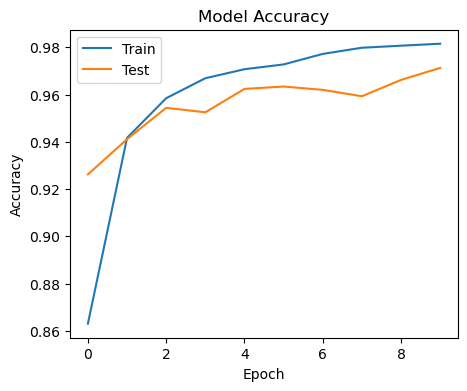

In [31]:
plt.figure(figsize=(5,4))
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='best')
plt.show()

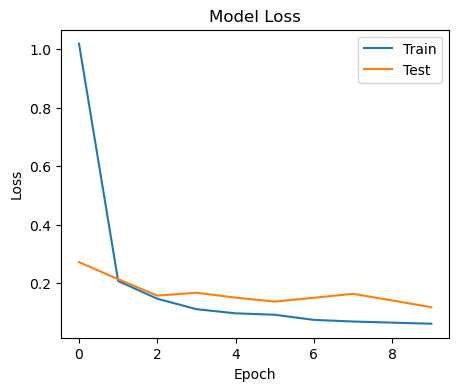

In [32]:
plt.figure(figsize=(5,4))
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='best')
plt.show()